# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [1]:
# import the necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!


In [14]:
# set out our probability facts first - 
# Given:
p_a = .7
p_b = .5
p_b_given_a = .4

print('GIVEN:  ')
print('p_a: ', p_a)
print('p_b: ', p_b)
print('p_b_given_a: ', p_b_given_a)


# Unknown:
p_a_and_b = 0        # Q1
p_a_or_b = 0         # Q2
p_a_given_b = 0      # Q3
p_b_given_comp_a = 0 # Q4


# apply formulas

# use Bayes first (most familiar!):
p_a_given_b = (p_b_given_a * p_a) / p_b

# use multiplication rule:
p_a_and_b = p_b * p_a_given_b

# union with exclusion
p_a_or_b = (p_a + p_b) - p_a_and_b

# complmenet
p_b_given_comp_a = 1 - p_b_given_a

print('\n')
print('SOLVE: ')
print('p_a_given_b after Bayes: ', p_a_given_b)
print('p_a_and_b after cond prob:  ', p_a_and_b)
print('p_a_or_b:  ', p_a_or_b)
print('p_b_given_comp_a: ', p_b_given_comp_a)

ans1 = round(p_a_and_b, 3)
ans2 = round(p_a_or_b, 3)
ans3 = round(p_a_given_b, 3)
ans4 = round(p_b_given_comp_a, 3)

GIVEN:  
p_a:  0.7
p_b:  0.5
p_b_given_a:  0.4


SOLVE: 
p_a_given_b after Bayes:  0.5599999999999999
p_a_and_b after cond prob:   0.27999999999999997
p_a_or_b:   0.9199999999999999
p_b_given_comp_a:  0.6


### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?



In [18]:
import math

In [23]:
# facts first:
deck = 52
kings = 4
queens = 4
king_or_queen = kings + queens
k_val = 5 # for Q2

#Q1:
ans1 = round(king_or_queen / deck, 3)
print('ans1: ', ans1)

#Q2:
ans2 = math.factorial(deck) / (math.factorial(deck-k_val) * math.factorial(k_val))
print('ans2: ', ans2)

# Q3
# set up some facts:
reds = 2
blacks = 3
cards = 5

# event space:
red_black = math.factorial(cards) / (math.factorial(reds) * math.factorial(blacks))

# sample space:
all_cards = (reds * blacks)**cards

ans3 = round(red_black / all_cards, 3)
print('ans3: ', ans3)

ans1:  0.154
ans2:  2598960.0
ans3:  0.001


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [42]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # use binomial formula:
    return (np.math.factorial(n) / (np.math.factorial(n-k) * np.math.factorial(k))) * (p**k) * (1-p)**(n-k)
    

2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [43]:
# establish probability first
faces = 12
deck = 52

prob = round(faces / deck, 3)

ans2 = round(probability_of_scoring_k(22, prob, 8), 3)
print('ans2: ', ans2)

ans2:  0.066


3. Plot the probability mass function of $k$ in 22 draws.


<BarContainer object of 22 artists>

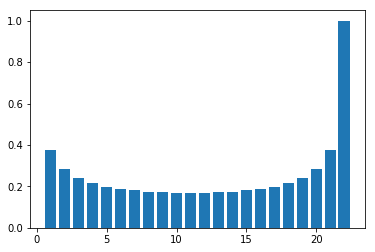

In [103]:
draw_probs = []
for k in range(1, 23):
    draw_p = round((k / 22), 3)
    draw_probs.append(probability_of_scoring_k(22, draw_p, k))
    pmf = np.array(draw_probs)
    
plt.bar(list(range(1,23)), pmf)

4. Plot the cumulative density function of $k$ in 22 draws.

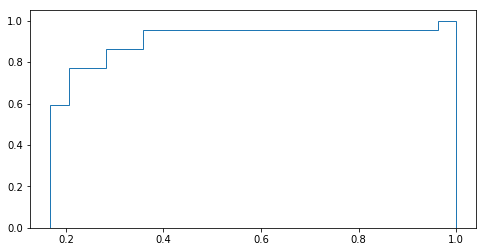

In [104]:
fig, ax = plt.subplots(figsize=(8, 4))

n_bins = 22
# plot the cumulative histogram
n, bins, patches = ax.hist(pmf, n_bins, density=True, histtype='step',
                           cumulative=True)


## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [105]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10]

np_ratings = np.array(ratings)

mean = round(np_ratings.mean(), 3)

median = round(np.median(np_ratings, axis=0), 3)

mode = stats.mode(np_ratings)[0][0]

standard_deviation = round(np.std(np_ratings), 3)

number_range = np.max(np_ratings, axis=0) - np.min(np_ratings, axis=0)
interquartile_range = np.quantile(np_ratings, .75, axis=0) - np.quantile(np_ratings, .25, axis=0)


print(
"Mean: ", mean, "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", standard_deviation, "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.694 
Median:  8.0 
Mode:  8.0 
Standard Deviation:  2.352 
Range:  9.0 
Interquartile Range:  1.0


2. What measure of centrality would you use to most fairly describe the ratings and why?

**Question 2 answer:**  

The mean, median and mode are fairly similar - they are not equal, but close in value; so this implies to me the ratings may be normally distributed.


### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

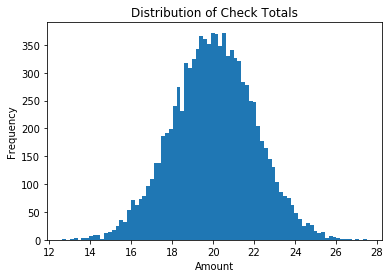

In [106]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [88]:
def z_score(check_amt):
    
    """
    check_amt = the amount for which we want to compute the z-score
    
    """
    # ideally we'd pass in mean and n, but we'll 
    # "hard-code" them here:
    mean = 20
    sigma = 2
    N = 10000
    
    return (check_amt - mean) / sigma 
    

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [100]:
# set up for question 2:  23 check
alpha = 0.05

# compute Z:
z = z_score(23)

# get p_value from stats
p_value = stats.norm.cdf(z)

ans2 = (p_value < alpha)

# set up for question 3: 24 check
z1 = z_score(24)
p_value1 = stats.norm.cdf(z1)

ans3 = (p_value1 < alpha)


4. Define **confidence interval** and determine the 95% confidence interval for this population.

### Your written answer here
**Answer:**
The confidence interval represents the interval lying between the mean + the margin of error, and the mean - the margin of error

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

### Your written answer here
**Answer:**
The CLT allows us to take random samples, and the distribution of the means of those samples will be normally distributed.


## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ Mean of non-queso checks >= queso checks

$H_{A}:$ $X_{Q}$ != mean of non-queso checks

2. In this context, what does it mean to make `Type I` and `Type II` errors?

**Answers to question 2 in markdown:**

For a **Type I error** we produce a false positive, meaning we believe we found evidence within our confidence interval that the average queso check of was more or less than the non-queso average check, so we reject the null hypotehsis; but that evidence may result from pure chance and be a false positive.

For a **Type II** error we produce a false negative - we found evidence OUTSIDE of our confidence interval regarding the average QUESO customer check, thinking we were NOT able to reject the null hypothesis, when in fact the null hypothesis is NOT valid!

### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

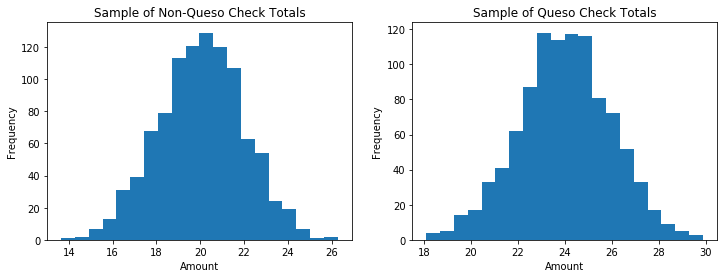

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [120]:
# set up alternate hypothesis:
# queso checks average are GREATER or LESS than NON-queso checks

# sigma is .05
# alpha is 0.05:  95% significane interval
# calculate statistic on BOTH samples (need non_queso and queso means)
# compare test statistic of NON-queso sample to queso sample
# dermine the critical or p-value (find the rejection region)
# Compare t-value with critical t-value to accept or reject the Null hypothesis.

N = 1000
no_queso_mean = round(no_queso.mean(), 3)
queso_mean = round(queso.mean(), 3)
sigma = round(queso.std(), 3)

t = (queso_mean -  no_queso_mean)/(sigma/np.sqrt(N)) 
t_crit = np.round(stats.t.ppf(1 - 0.05, df=N-1),3)
print(t_crit)

1.646


**Commentary**:
The t-critical value is NOT less than our alpha region of 0.05, so therefore we CANNOT reject the null hypothesis

2. What are the conditions required to perform the test you chose?

### Your written answer here
**Answer:**
We needed sample size, means of both samples, the sample's sigma.


## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For Part 2, what is the prior, posterior and likelihood?

In [ ]:
# Thanks Rob for the help!

# S = Small Puppy
# M = Medium
# L = Large
# Pet = Pet Store
# PD = Pound

# P(Pet) = .2
# P(PD) = .8
# P(S | Pet) = .6
# P(M | Pet) = .3
# P(S | PD) = P(S AND PD) / P(PD)
# P(S | PD) = .08 / .8
# P(S | PD) = .1
# P(L | PD) = .55
# P(PD AND L) = .44
# P(Pet AND L) = .02
# P(L) = .46

#P(L | Pet) - .1

# P(S) = ( S AND Pet) + P(S AND PD)
# P(S) = .12 + .08
# P(S) = .2

ans1 = .2
ans2 = .46

# P(PD | S) = .4
# P(Pet |S) = .6

ans3 = "more likely he went to PET store!"

ans4_prior = "Pet store OR Pound"
ans4_posterior = "Likeliehood of choosing a pet given pet store or pound"
ans4_likelihood = "Probability of choosing a store or the pound, given he wants a dog"